In [75]:
# Importage
import warnings
warnings.filterwarnings('ignore')

# os stuff
import os
import sys

import nibabel as nib
from nilearn.plotting import plot_surf, plot_surf_stat_map, plot_roi, plot_anat, plot_surf_roi
from nilearn.image import index_img

import seaborn as sns

# whobpyt stuff
import whobpyt
from whobpyt.data.dataload import dataloader
# from whobpyt.models.jansen_rit import RNNJANSEN
from whobpyt.models.wong_wang import RNNRWW
from whobpyt.datatypes.modelparameters import ParamsModel
from whobpyt.optimization.modelfitting import Model_fitting

# array and pd stuff
import numpy as np
import pandas as pd

# viz stuff
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
import seaborn as sns
import scipy.stats as stats

In [4]:
import pickle

In [5]:
parcs = np.arange(0,200,1)

mask = np.tril_indices(len(parcs), -1)

# Labels
_label_file =  '/external/rprshnas01/kcni/hharita/Code/whobpyt/scratch/Schaefer200_7_Ntwx_labels.txt'

f = open(_label_file, "r")
q = f.read()
q = q.rsplit('\n')
# del q[-32:]
labels = q.copy()
labels = np.array(labels)
labels = labels[parcs]


In [6]:
import re

In [7]:
folder_one_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II'
folder_two_path = SCs_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Improved_WWD_HCP_model_runs/All_Subs_SC_Wts/Davide_HCP_Data_Matrix'

# Get the list of files in each folder
folder_one_files = os.listdir(folder_one_path)
folder_two_files = os.listdir(folder_two_path)

# Extract the numbers from the filenames in folder_one
folder_one_numbers = []
for file in folder_one_files:
    match = re.search(r'\d+', file)
    if match:
        folder_one_numbers.append(int(match.group()))

# Extract the numbers from the filenames in folder_two
folder_two_numbers = []
for file in folder_two_files:
    match = re.search(r'\d+', file)
    if match:
        folder_two_numbers.append(int(match.group()))

# Find the common numbers between the two folders
common_numbers = list(set(folder_one_numbers) & set(folder_two_numbers))

sub_list = common_numbers.copy()

sub_list.sort()

sub_list = sub_list[0:200]

In [10]:
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II/'

In [11]:
def emp_fc(sub_id):
    pconn1LR = pconn_path + '{0}_rfMRI_REST1_RL_Schaefer200_cifti_parcellated.ptseries.nii'.format(sub_id)
    pconn_img1LR = nib.load(pconn1LR)
    pconn_dat1LR = pconn_img1LR.get_data()
    pconn_dat1LR = pconn_dat1LR/1
    return pconn_dat1LR

In [12]:
%%time

all_subs_emp_fc = []
for i in range(len(sub_list)):
    ss_emp_fc = emp_fc(sub_list[i])
    all_subs_emp_fc.append(ss_emp_fc)

CPU times: user 1min 2s, sys: 425 ms, total: 1min 2s
Wall time: 1min 12s


In [13]:
%%time
all_subs_emp_fc_mat = []
for i in range(200):
    all_subs_emp_fc_mat.append(np.corrcoef(all_subs_emp_fc[i].T))

CPU times: user 1.41 s, sys: 89.4 ms, total: 1.5 s
Wall time: 1.5 s


In [14]:
og_whobpyt_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run'
lesion_whobpyt_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/Ntwx_Lesion_WhoBPyT_200_subs'

In [18]:
pkl_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run_pkls'

In [151]:
Ntwx_resilience_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run_Ntwx_Resilience_II'

In [152]:
ntwx = ['vis','smt','dan','van','lim','fpn','dmn']

In [153]:
def func_to_load_ntwx_resilience_lists(sub_id,ntwx):
    resilience_file = Ntwx_resilience_path + '/{0}_list_of_{1}_ntwx_resilience_fc.txt'.format(sub_id,ntwx)
    load_res_file = np.loadtxt(resilience_file)
    
    return load_res_file
    

In [154]:
# Load the subs resilience files for each ntwx

In [155]:
# 131217_list_of_vis_ntwx_resilience_fc.txt

In [156]:
vis_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_vis_res_list = func_to_load_ntwx_resilience_lists(sub_id,'vis')
    vis_ntwx_resilience_all_subs.append(ss_vis_res_list)
    
vis_ntwx_resilience_all_subs_mean = np.mean(vis_ntwx_resilience_all_subs, axis=0)

In [157]:
smt_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_smt_res_list = func_to_load_ntwx_resilience_lists(sub_id,'smt')
    smt_ntwx_resilience_all_subs.append(ss_smt_res_list)
    
smt_ntwx_resilience_all_subs_mean = np.mean(smt_ntwx_resilience_all_subs, axis=0)

In [158]:
dan_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_dan_res_list = func_to_load_ntwx_resilience_lists(sub_id,'dan')
    dan_ntwx_resilience_all_subs.append(ss_dan_res_list)
    
dan_ntwx_resilience_all_subs_mean = np.mean(dan_ntwx_resilience_all_subs, axis=0)

In [159]:
van_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_van_res_list = func_to_load_ntwx_resilience_lists(sub_id,'van')
    van_ntwx_resilience_all_subs.append(ss_van_res_list)
    
van_ntwx_resilience_all_subs_mean = np.mean(van_ntwx_resilience_all_subs, axis=0)

In [160]:
lim_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_lim_res_list = func_to_load_ntwx_resilience_lists(sub_id,'lim')
    lim_ntwx_resilience_all_subs.append(ss_lim_res_list)
    
lim_ntwx_resilience_all_subs_mean = np.mean(lim_ntwx_resilience_all_subs, axis=0)

In [161]:
fpn_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_fpn_res_list = func_to_load_ntwx_resilience_lists(sub_id,'fpn')
    fpn_ntwx_resilience_all_subs.append(ss_fpn_res_list)
    
fpn_ntwx_resilience_all_subs_mean = np.mean(fpn_ntwx_resilience_all_subs, axis=0)

In [162]:
dmn_ntwx_resilience_all_subs = []

for i in range(200):
    sub_id = sub_list[i]
    ss_dmn_res_list = func_to_load_ntwx_resilience_lists(sub_id,'dmn')
    dmn_ntwx_resilience_all_subs.append(ss_dmn_res_list)
    
dmn_ntwx_resilience_all_subs_mean = np.mean(dmn_ntwx_resilience_all_subs, axis=0)

In [163]:
data_lists = [vis_ntwx_resilience_all_subs_mean,
smt_ntwx_resilience_all_subs_mean,
dan_ntwx_resilience_all_subs_mean,
van_ntwx_resilience_all_subs_mean,
lim_ntwx_resilience_all_subs_mean,
fpn_ntwx_resilience_all_subs_mean,
dmn_ntwx_resilience_all_subs_mean]

In [164]:
data_lists

[array([0.47685339, 0.43644252, 0.42028693, 0.41114365, 0.39545154,
        0.38179554, 0.36986245, 0.35671727, 0.34321641, 0.33038389,
        0.31657108, 0.30619474, 0.29362545, 0.28185695, 0.27089923,
        0.26199414, 0.25058207, 0.24149647, 0.23049881, 0.22308338,
        0.21381452, 0.20516084, 0.19872903, 0.19139085, 0.18476419,
        0.17771385, 0.174298  , 0.16745983, 0.16468367, 0.15986789]),
 array([0.37346785, 0.35829717, 0.3547545 , 0.34773405, 0.34286572,
        0.33768005, 0.33261141, 0.32367433, 0.32275367, 0.31516073,
        0.30885696, 0.30268255, 0.29852753, 0.29137952, 0.28500022,
        0.27757714, 0.27763241, 0.26866734, 0.26313796, 0.25860966,
        0.2537473 , 0.24962383, 0.24319904, 0.23944418, 0.23430844,
        0.22885602, 0.22303975, 0.21989935, 0.21518985, 0.21186929,
        0.20600251, 0.20344315, 0.19888365, 0.19739272, 0.19131452,
        0.1898996 ]),
 array([0.42835028, 0.41305953, 0.40473911, 0.3947604 , 0.38765449,
        0.3791315 , 0.36

In [173]:
x_axis_vals = np.arange(0,101)

In [194]:
%%time
all_ntwx_x_vals = []
for i in range(7):
    step = 100/(len(data_lists[i])-1)
    ntwx_x_vals = np.arange(0,101,step)
    all_ntwx_x_vals.append(ntwx_x_vals)
    del step

CPU times: user 72 µs, sys: 875 µs, total: 947 µs
Wall time: 536 µs


In [181]:
# Hex color codes for the lines
hex_codes = ['#781286', '#4682B4', '#00760E', '#C43AFA', '#DCF8A4', '#E69422', '#CD3E4E']

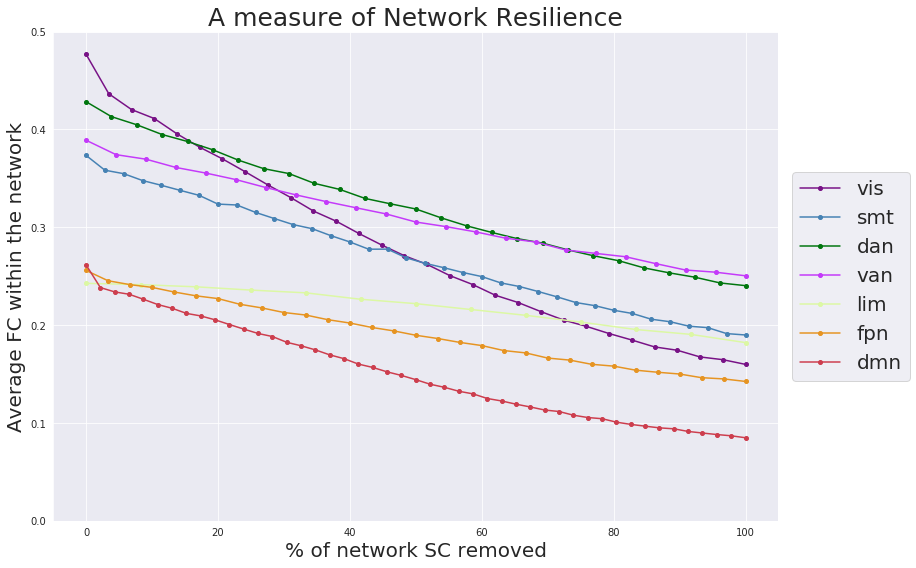

In [208]:
sns.set_style('darkgrid')
# Create a figure and axis
fig, ax = plt.subplots(figsize=(13,9))
for i in range(7):
    
    ax.plot(all_ntwx_x_vals[i],data_lists[i], color=hex_codes[i], marker='o', linestyle='-', markersize=4)

# Set the y-axis range from 0 to 1
ax.set_ylim(0, 0.5)

plt.xlabel('% of network SC removed', fontsize=20)
plt.ylabel('Average FC within the network', fontsize=20)
plt.title('A measure of Network Resilience',fontsize=25)
plt.legend(ntwx,bbox_to_anchor=[1.1, 0.5], loc='center',prop={'size': 20})

# Show the plot
plt.show()

In [167]:
# 200_subjects_WhoBPyT_run_Ntwx_Resilience --> mean_fc = lh+rh+(lhrh+rhlh)/2 (high values)
# 200_subjects_WhoBPyT_run_Ntwx_Resilience_II --> mean_fc = (lh+rh)/2+(lhrh+rhlh)/2 (medium values)
# 200_subjects_WhoBPyT_run_Ntwx_Resilience_III --> mean_fc = (lh+rh+lhrh+rhlh)/4 (low values)

### Measuring the resilience at each step (i.e., decrease)

In [168]:
rate_of_decrease_percentage_all = []
for i in range(7):
    values = data_lists[i]
    # Calculate the rate of decrease as a percentage change between consecutive values
    rate_of_decrease_percentage = [(values[i + 1] - values[i]) / values[i] * 100 for i in range(len(values) - 1)]
    rate_of_decrease_percentage_all.append(rate_of_decrease_percentage)
    # Now, 'rate_of_decrease_percentage' is a list of percentage changes between consecutive values
    print('{0} Ntwx'.format(ntwx[i]))
    print('decrease %')
    print(np.abs(rate_of_decrease_percentage))
    print(np.mean(np.abs(rate_of_decrease_percentage)))
    print('----------------------------------- \n')

vis Ntwx
decrease %
[8.47448522 3.70165317 2.17548658 3.81669654 3.45326678 3.12551983
 3.55407168 3.78475059 3.73890135 4.18083592 3.27772769 4.10499893
 4.00799811 3.88769006 3.28723087 4.35584862 3.62580042 4.55396152
 3.21712288 4.15488543 4.04728426 3.13501131 3.69255436 3.46237102
 3.81585758 1.9221041  3.92326425 1.65780826 2.92425907]
3.691705047983079
----------------------------------- 

smt Ntwx
decrease %
[4.06211288 0.98875058 1.97896029 1.40001619 1.51245019 1.50101618
 2.68694477 0.28444132 2.35254924 2.0001751  1.99911493 1.37273442
 2.39442276 2.18934322 2.60458526 0.01990904 3.22911454 2.05807579
 1.72088348 1.88019605 1.62502714 2.57379036 1.54394262 2.14486158
 2.3270245  2.54145468 1.40799996 2.14166182 1.5430844  2.76905693
 1.24239023 2.24117029 0.74964577 3.07924166 0.73958046]
1.9115922457436467
----------------------------------- 

dan Ntwx
decrease %
[3.56968241 2.01433877 2.46546809 1.80005692 2.19860439 2.76677682
 2.36319052 1.40540019 2.82147358 1.7878069

In [169]:
abs_rate_of_decrease_percentage_all = []
for i in range(7):
    abs_rate_of_decrease_percentage_all.append(np.abs(rate_of_decrease_percentage_all[i]))

In [170]:
abs_rate_of_decrease_percentage_all

[array([8.47448522, 3.70165317, 2.17548658, 3.81669654, 3.45326678,
        3.12551983, 3.55407168, 3.78475059, 3.73890135, 4.18083592,
        3.27772769, 4.10499893, 4.00799811, 3.88769006, 3.28723087,
        4.35584862, 3.62580042, 4.55396152, 3.21712288, 4.15488543,
        4.04728426, 3.13501131, 3.69255436, 3.46237102, 3.81585758,
        1.9221041 , 3.92326425, 1.65780826, 2.92425907]),
 array([4.06211288, 0.98875058, 1.97896029, 1.40001619, 1.51245019,
        1.50101618, 2.68694477, 0.28444132, 2.35254924, 2.0001751 ,
        1.99911493, 1.37273442, 2.39442276, 2.18934322, 2.60458526,
        0.01990904, 3.22911454, 2.05807579, 1.72088348, 1.88019605,
        1.62502714, 2.57379036, 1.54394262, 2.14486158, 2.3270245 ,
        2.54145468, 1.40799996, 2.14166182, 1.5430844 , 2.76905693,
        1.24239023, 2.24117029, 0.74964577, 3.07924166, 0.73958046]),
 array([3.56968241, 2.01433877, 2.46546809, 1.80005692, 2.19860439,
        2.76677682, 2.36319052, 1.40540019, 2.82147358, 

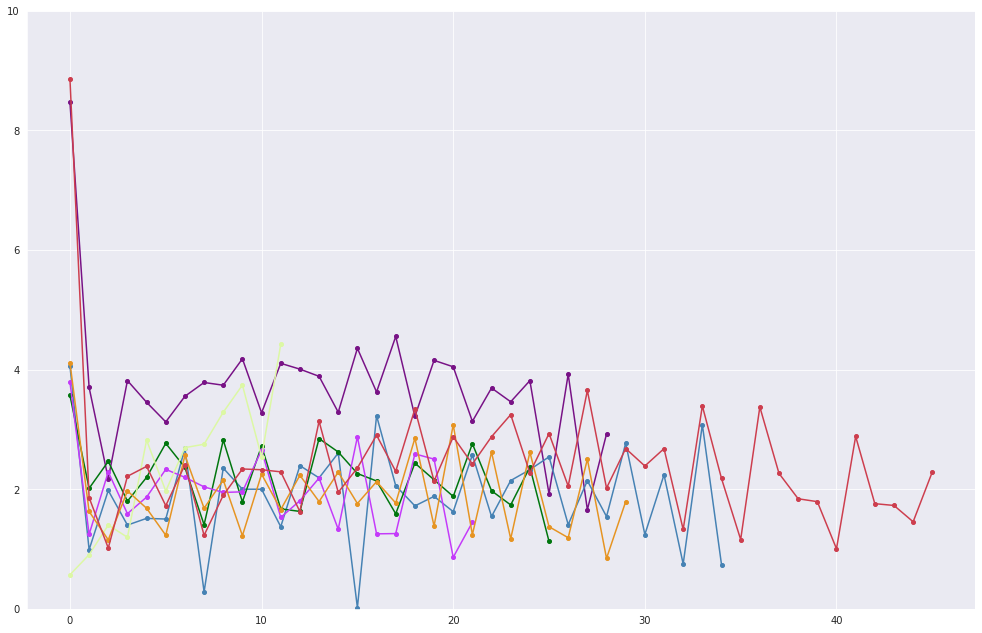

In [172]:
# Hex color codes for the lines
hex_codes = ['#781286', '#4682B4', '#00760E', '#C43AFA', '#DCF8A4', '#E69422', '#CD3E4E']

sns.set_style('darkgrid')
# Create a figure and axis
fig, ax = plt.subplots(figsize=(17,11))

# Iterate through the data lists and hex codes to plot each line
for data, color in zip(abs_rate_of_decrease_percentage_all, hex_codes):
    ax.plot(data, color=color, marker='o', linestyle='-', markersize=4)

# Set the y-axis range from 0 to 1
ax.set_ylim(0, 10)

# Show the plot
plt.show()